# first import all the libraries required

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
sns.set()
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV
import ipywidgets as widgets
from IPython.display import display

# load data

In [2]:
data = pd.read_csv("Insurance_prediction.csv")

In [3]:
data.head(1339)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
Numerical_Features = [i for i in data.dtypes[data.dtypes != 'object'].index]
Categorical_Features = [i for i in data.dtypes[data.dtypes == 'object'].index]
print(f'Numerical Features: {Numerical_Features} ')
print(f'Categorical Features: {Categorical_Features}')

Numerical Features: ['age', 'bmi', 'children', 'expenses'] 
Categorical Features: ['sex', 'smoker', 'region']


In [6]:
data[Numerical_Features].describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
data[Categorical_Features].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [8]:
# Checking for unique values in every column
data.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [10]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

# checking for outliers

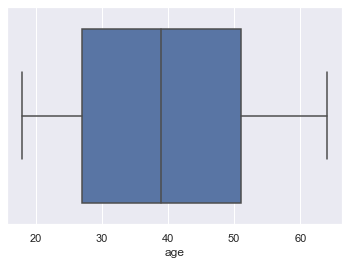

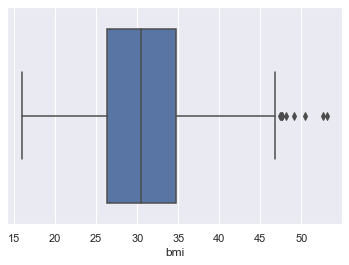

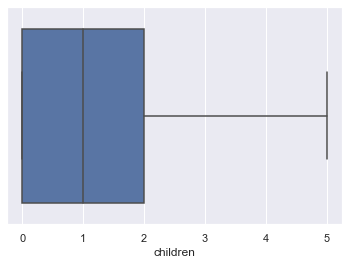

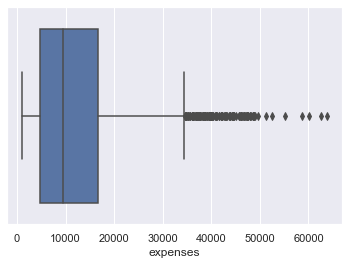

In [11]:
def Boxplot(dataset):
  for i in dataset.dtypes[dataset.dtypes != 'object'].index:
    sns.boxplot(dataset[i])
    plt.show();

Boxplot(data)

In [12]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_iqr(data['bmi'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [47.4, 47.5, 47.6, 47.7, 48.1, 49.1, 50.4, 52.6, 53.1]


# checking for any duplicate values

In [13]:
Before_shape = data.shape
Duplicate = data.duplicated().sum()
data = data.drop_duplicates()
after_shape = data.shape
print(f'Orginal Shape: {Before_shape} \nNo. of Duplicates: {Duplicate}\nAfter Droping Duplicate: {after_shape}')

Orginal Shape: (1338, 7) 
No. of Duplicates: 1
After Droping Duplicate: (1337, 7)


# data visualization using sns

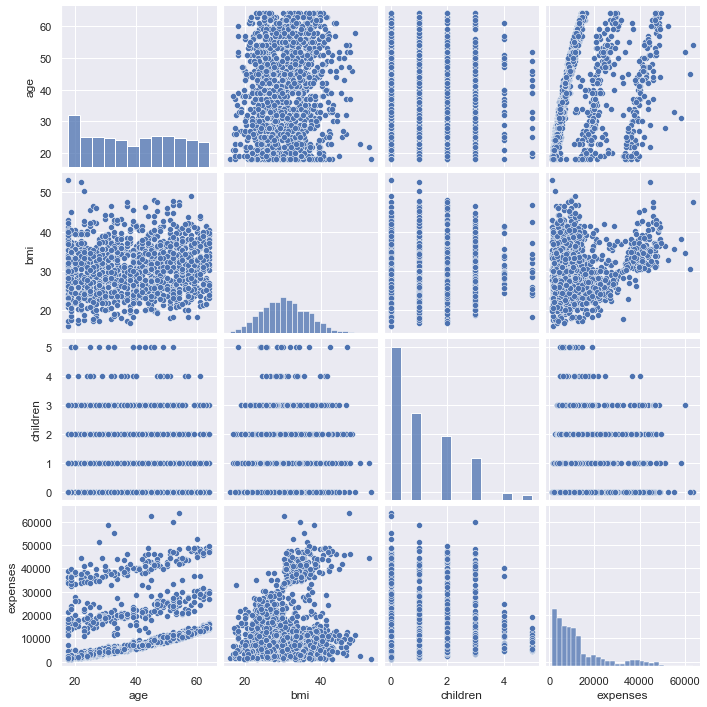

In [14]:
sns.pairplot(data)

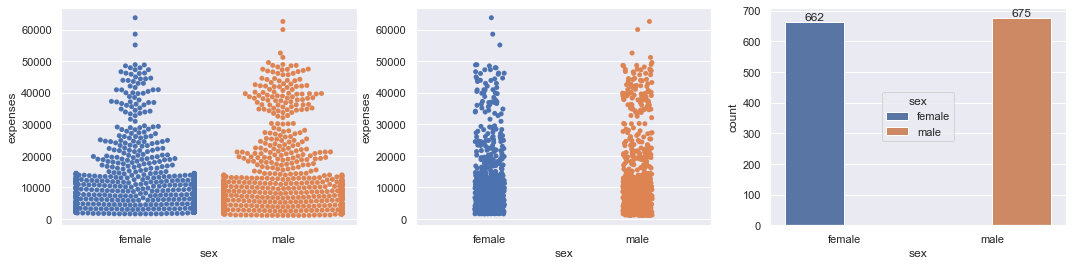

In [15]:
fig, ax = plt.subplots(1,3,figsize=(18,4))
sns.swarmplot(ax=ax[0],x='sex',y='expenses',data=data,)
sns.stripplot(ax=ax[1],x='sex',y='expenses',data=data)
sns.countplot(ax=ax[2],x='sex',hue='sex',data=data)
ax[2].bar_label(ax[2].containers[0])
ax[2].bar_label(ax[2].containers[1])
plt.legend(loc='center',title='sex')

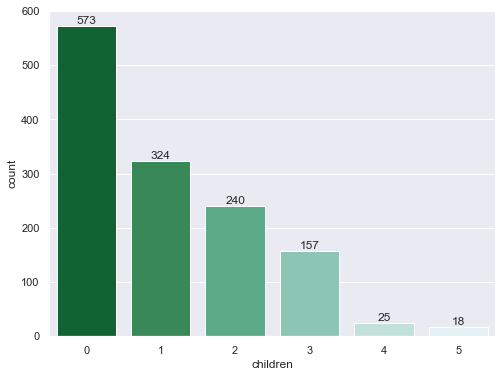

In [16]:
#for column=children
plt.figure(figsize=(8,6))
ax = sns.countplot(data.children,palette='BuGn_r')
ax.bar_label(ax.containers[0]);

# conclusion-number of people having 3,4 and 5 children are very less in number , whereas number of people having 1 or 2 children are in average and people with no children are highest in number

Text(-0.3, 294, '20.49%')

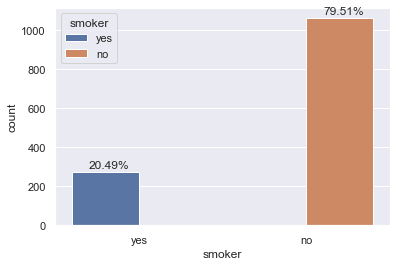

In [17]:
# plot for Smoker
sns.countplot(data.smoker,hue = data.smoker)
plt.text(x = 1.1 ,y = data.smoker.value_counts()[0]+ 20,s = str(round(data.smoker.value_counts()[0]/len(data)*100,2))+ '%')
plt.text(x = -0.3,y = data.smoker.value_counts()[1]+20,s = str(round(data.smoker.value_counts()[1]/len(data)*100,2))+ '%')

# number of people who do not smoke is more than the smokers(non smokers>smokers)

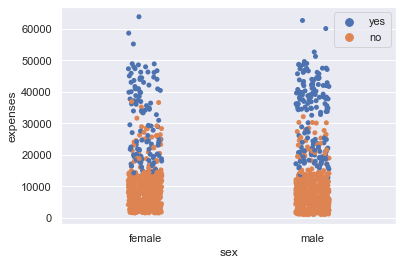

In [18]:
# Gender vs Smoker
sns.stripplot(x = 'sex',y = 'expenses',data = data,hue='smoker')
plt.legend(loc = 'best')

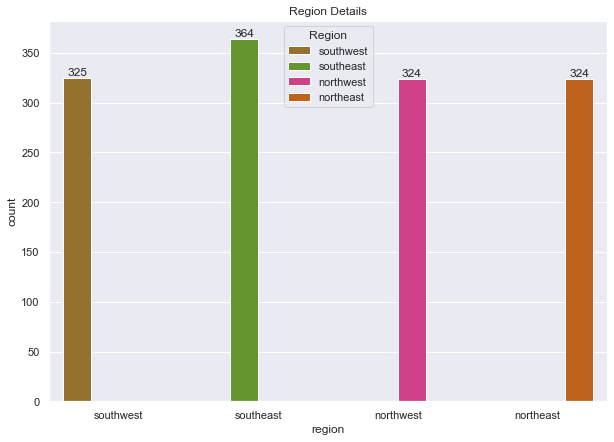

In [19]:
# plot for Column=region
plt.figure(figsize=(10,7))
ax = sns.countplot(x='region',data= data,hue='region',palette='Dark2_r')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Region Details")
plt.legend(loc='upper center',title='Region')
plt.show()

# conclusion-there is no significant differences between the region just  southeast region is slightly high

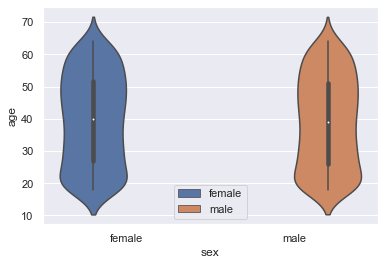

In [20]:
sns.violinplot(x = 'sex',y = 'age',data = data,hue = 'sex')
plt.legend(loc = 'best')

# conclusion-age of the people is approximately equal for both the sex

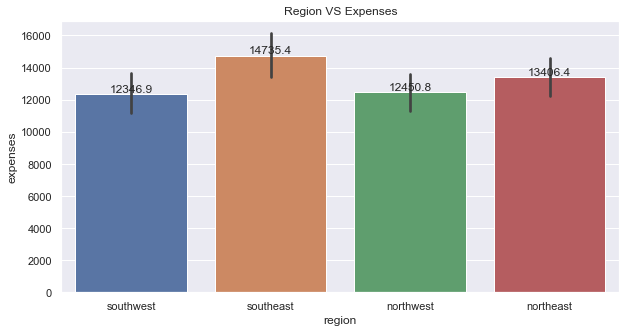

In [21]:
#region vs expenses
plt.figure(figsize=(10,5))
ax = sns.barplot(x='region',y='expenses',data = data)
ax.bar_label(ax.containers[0])
plt.title('Region VS Expenses')
plt.show()

# conclusion-people living in southeast have highest expenses than others . region affects our expenses

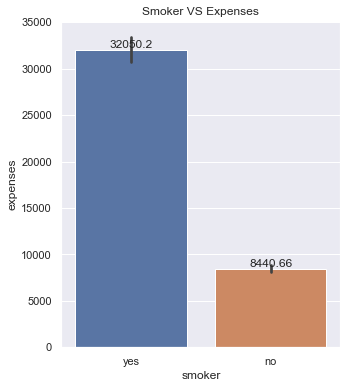

In [22]:
#smoker vs expenses
plt.figure(figsize=(5,6))
ax = sns.barplot(x='smoker',y='expenses',data = data)
ax.bar_label(ax.containers[0])
plt.title('Smoker VS Expenses')
plt.show()

# conclusion-smokers have higher expenses

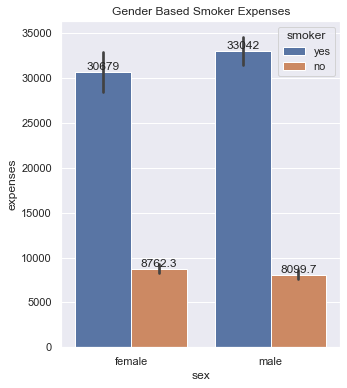

In [23]:
plt.figure(figsize=(5,6))
ax = sns.barplot(x='sex',y='expenses',hue='smoker',data = data)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Gender Based Smoker Expenses')
plt.show()

# conclusion-this plot shows that smoker men are higher than smoker women where as non smoker women expenses are higher than non smoker men

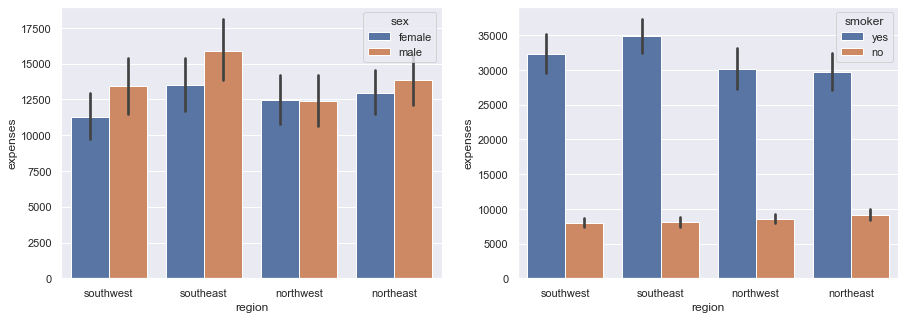

In [24]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.barplot(data.region, data.expenses, hue = data.sex)

ax1 = f.add_subplot(122)
sns.barplot(data.region, data.expenses, hue = data.smoker)
plt.show()

# conclusion - in 1st plot male in southeast have higher expenses than others and plot 2 shows non smoker  in northeast have higher expenses and smoker of southeast have higher expenses

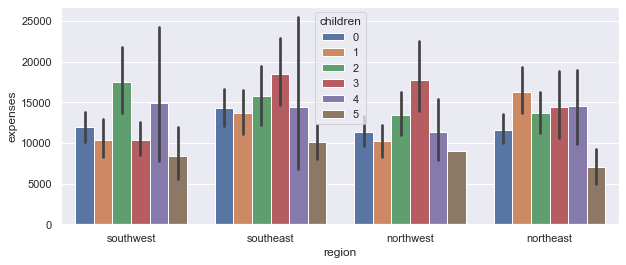

In [25]:
plt.figure(figsize=(10,4))
sns.barplot(data.region, data.expenses, hue = data.children)

plt.show()

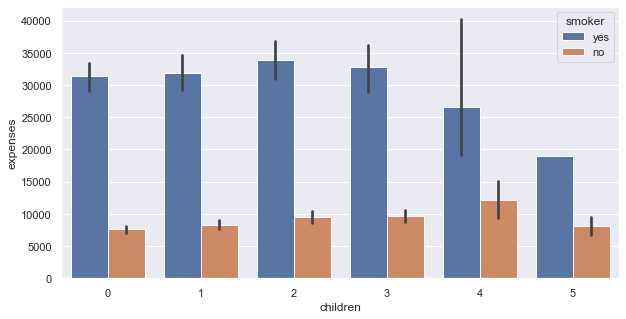

In [26]:
ax1 = f.add_subplot(122)
plt.figure(figsize=(10,5))
sns.barplot(data.children, data.expenses, hue = data.smoker)
for container in ax1.containers:
    ax1.bar_label(container)
plt.show()

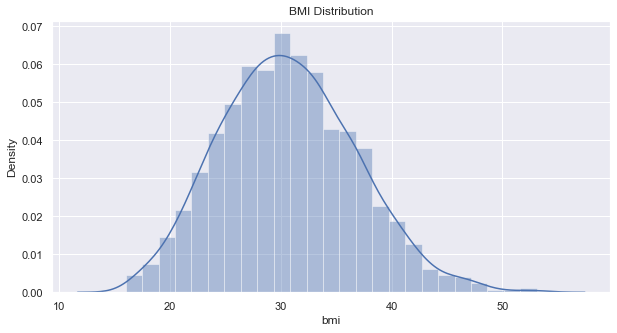

In [27]:
# Distribution of BMI Value

sns.set()
plt.figure(figsize=(10,5))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

# conclusion-It shows that BMI is nearly normally distributed,But normal BMI range for a person is 18.5 to 24.9,it shows the lot people are over weight it can affect a insurance cost

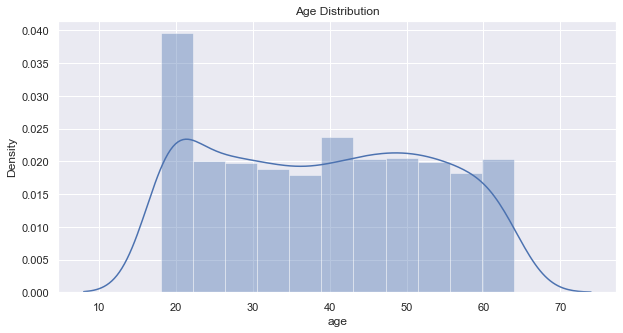

In [28]:
# Distribution of Age Value

sns.set()
plt.figure(figsize=(10,5))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

# conclusion - we can see from above representation that people of age 20 and 21 are more in number compare to others

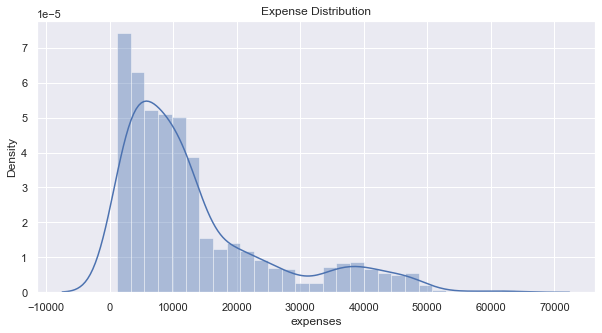

In [29]:
# Distribution of Expenses Value

sns.set()
plt.figure(figsize=(10,5))
sns.distplot(data['expenses'])
plt.title('Expense Distribution')
plt.show()

# conclusion-This Distribution shows us that data is not normally distributed but we have more values in lower expenses that gives cost is not so to high

<AxesSubplot:>

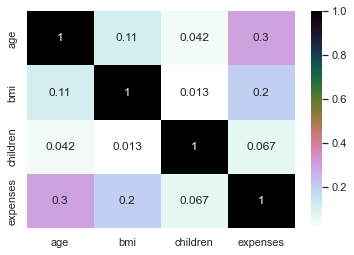

In [30]:
sns.heatmap(data.corr(),annot=True,cmap = 'cubehelix_r')

# preprocessing of data

In [31]:
# Creating a function
def preprocess_inputs(df):
    df = df.copy()

    # Split df into X and Y
    y = df['expenses']
    x = df.drop('expenses', axis=1)

    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.7, shuffle = True, random_state=101)

    return x_train, x_test, y_train, y_test

In [32]:
x_train, x_test, y_train, y_test = preprocess_inputs(data)

In [33]:
x_train.head()

,age,sex,bmi,children,smoker,region
405,52,female,38.4,2,no,northeast
836,36,male,31.5,0,no,southwest
483,51,female,39.5,1,no,southwest
319,32,male,37.3,1,no,northeast
957,24,male,26.8,1,no,northwest


In [34]:
y_train.head()

405    11396.90
836     4402.23
483     9880.07
319     4667.61
957    12609.89
Name: expenses, dtype: float64

# pipeline building and training of data

In [35]:
nominal_features = ['sex', 'smoker', 'region']


nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse = False, drop = 'if_binary'))
])


preprocessor = ColumnTransformer(transformers=[
    ('nominal', nominal_transformer, nominal_features)
], remainder='passthrough')


KNN_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('regressor', KNeighborsRegressor())
])

RF_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

GB_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('regressor', GradientBoostingRegressor())
])

# Gradiant boosting regression

In [36]:
GB_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('scaler', StandardScaler()),
                ('regressor', GradientBoostingRegressor())])

In [37]:
y_pred_GB = GB_model.predict(x_test)

In [38]:
y_pred_GB

array([ 7244.35902298,  3848.39800059,  5035.64427465, 11192.4950453 ,
        7504.20680672,  2617.2617315 , 15218.98677152,  6581.90253468,
       11381.83740075,  5909.01685253,  7359.63039315, 11417.41405381,
       16753.22321671, 13735.07682109,  7684.34962842, 42974.62698258,
        8721.169348  , 10619.97802291, 10780.46510437, 10950.79283934,
        2617.2617315 , 36154.37591844, 24565.30043358, 13411.152626  ,
       35478.98481056, 18266.95285316, 11175.71184785,  9126.2814226 ,
        7868.3202398 ,  7970.15625188,  2541.36951905,  9024.22756174,
        3375.06378907,  5041.21684475,  2059.21285357, 12576.38529502,
        8861.17977492, 11534.8126876 , 14843.41577318,  2579.07842766,
       11969.85160461, 39293.54685737, 11039.05650504, 10036.11698224,
       27899.8284892 ,  2442.87898574, 19501.81613929,  6278.42634783,
       42970.73813492,  5833.97026794,  1142.10785646,  3731.23325687,
        6926.29336031,  7698.04796107,  5318.8187074 , 14379.49366168,
      

In [39]:
# MEAN
y_pred_GB_m = np.mean((y_test - y_pred_GB)**2)
y_pred_GB_m



22252171.092550013

In [40]:
# RMSE
np.sqrt(y_pred_GB_m)

4717.220695764617

In [41]:
# Error for our model
yt_m1 = ((y_test - y_pred_GB)**2)
yt_m1

44      1.356501e+06
134     1.935404e+06
981     2.865507e+05
619     2.293022e+05
1239    1.819677e+07
            ...     
375     3.454401e+05
687     4.588878e+06
103     2.505159e+07
1138    3.796065e+06
715     1.771200e+06
Name: expenses, Length: 402, dtype: float64

In [42]:
# Error between ytest & ytest mean and squaring it
yt_m_diff = ((y_test - y_test.mean())**2)
yt_m_diff

44      4.347345e+07
134     1.043646e+08
981     6.679417e+07
619     3.839524e+06
1239    8.901300e+07
            ...     
375     2.873882e+07
687     5.233597e+07
103     3.337593e+08
1138    8.043866e+07
715     2.768236e+05
Name: expenses, Length: 402, dtype: float64

In [43]:
# Sum of the squared error for baseline model
yt1 = np.sum(yt_m_diff)
yt1
563349

563349

In [44]:
# Sum of the squared error for our model
yt2 = np.sum(yt_m1)
yt2

8945372779.205101

In [45]:
# R-Squared Error
R2 = 1-(yt2/yt1)
R2

0.8412108658979233

In [46]:
r2_score(y_test, y_pred_GB)

0.8412108658979233

# KNN

In [47]:
KNN_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('scaler', StandardScaler()),
                ('regressor', KNeighborsRegressor())])

In [48]:
y_prediction= KNN_model.predict(x_test)

In [49]:
y_prediction

array([ 7039.834,  7332.066,  4491.486, 11731.448,  3603.322,  2125.842,
       11978.454,  8505.568, 10492.018,  6736.724,  9373.748, 10825.57 ,
       13312.88 , 12452.384,  7225.252, 44430.826,  9648.58 , 11417.168,
       13108.462, 12341.504,  2125.842, 30437.312, 35725.794, 10787.354,
       28254.986, 28030.842, 12206.864, 10280.744,  9980.792, 11944.082,
        2980.622,  8767.08 ,  2056.732,  7164.394,  3206.99 ,  6091.212,
       13714.764, 11434.08 , 11958.948,  1651.36 , 16617.93 , 34013.87 ,
        8718.218,  9648.58 , 39746.694,  1802.874, 25122.4  ,  9182.692,
       42872.692,  2720.9  ,  1935.952,  3974.142, 12744.826,  8764.986,
       11685.39 , 11999.932, 22804.1  , 11754.544,  5153.958,  7277.732,
        9350.842, 12006.508, 31382.712, 12710.328, 13172.08 , 13244.376,
        3778.506, 13714.5  , 13663.97 , 37028.202, 29643.332, 35282.044,
        6174.308,  1381.654,  6853.292, 33534.39 , 13103.958, 37300.878,
        2514.368,  8738.626, 11913.904,  5452.592, 

In [50]:
y_test

44       6079.67
134      2457.21
981      4500.34
619     10713.64
1239     3238.44
          ...   
375     18033.97
687      5438.75
103     30942.19
1138     3704.35
715     12146.97
Name: expenses, Length: 402, dtype: float64

In [51]:
# Calculating the error 
y_test - y_prediction

44      -960.164
134    -4874.856
981        8.854
619    -1017.808
1239    -364.882
          ...   
375    -6499.518
687    -5273.060
103     4446.450
1138     464.854
715     2430.048
Name: expenses, Length: 402, dtype: float64

In [52]:
# MEAN
y_pred_mean = np.mean((y_test - y_prediction)**2)
y_pred_mean

32062335.073065303

In [53]:
# RMSE
np.sqrt(y_pred_mean)

5662.3612630302305

In [54]:
y_test.describe()

count      402.000000
mean     12673.110274
std      11852.682342
min       1121.870000
25%       4529.420000
50%       8721.255000
75%      14225.402500
max      63770.430000
Name: expenses, dtype: float64

In [55]:
y_train.mean()

13539.674117647048

In [56]:
y_test.mean()

12673.110273631839

In [57]:
# Error between ytest & ytest 
yt_difference = ((y_test - y_test.mean())**2)
yt_difference

44      4.347345e+07
134     1.043646e+08
981     6.679417e+07
619     3.839524e+06
1239    8.901300e+07
            ...     
375     2.873882e+07
687     5.233597e+07
103     3.337593e+08
1138    8.043866e+07
715     2.768236e+05
Name: expenses, Length: 402, dtype: float64

In [58]:
# Sum of the squared error for baseline model
yt = np.sum(yt_difference)
yt

56334917560.88687

In [59]:
# Error for our model
yt_mean = ((y_test - y_prediction)**2)
yt_mean

44      9.219149e+05
134     2.376422e+07
981     7.839332e+01
619     1.035933e+06
1239    1.331389e+05
            ...     
375     4.224373e+07
687     2.780516e+07
103     1.977092e+07
1138    2.160892e+05
715     5.905133e+06
Name: expenses, Length: 402, dtype: float64

In [60]:
# Sum of the squared error for our model
yt1 = np.sum(yt_mean)
yt1

12889058699.372261

In [61]:
# R-Squared Error
R2 = 1-(yt1/yt)
R2

0.7712065756474793

In [62]:
r2_score(y_test, y_prediction)

0.7712065756474793

# Random Forest

In [63]:

RF_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor())])

In [64]:
y_prediction_RF = RF_model.predict(x_test)

In [65]:
y_prediction_RF

array([ 8371.7678,  4644.4574, 10199.4137, 11347.0866,  7884.6623,
        2469.5195, 13280.8727,  6364.63  , 12197.5926,  4595.7083,
        6596.6918, 10621.1222, 14955.452 , 13003.9886,  7028.0232,
       43678.2212,  7891.903 ,  8748.7483, 10739.7245, 10591.558 ,
        2469.5195, 35593.7785, 25033.6936, 12170.4063, 33749.1202,
       17132.6621, 12583.1906,  9117.8394,  7583.5848,  9407.7957,
        1812.1525,  9179.7894,  3169.7263,  4200.446 ,  1952.5603,
        6654.45  ,  9382.2443, 11879.8769, 14042.5506,  2224.0701,
       11996.156 , 40369.4225, 12575.7144,  9466.5422, 26717.7314,
        2397.098 , 18850.2522, 11845.8356, 44542.7052,  5634.9861,
        1286.3582,  3228.1393,  5929.0791,  6614.8886,  6343.5924,
       13600.7907, 21022.8912, 11619.3177,  5770.239 ,  7332.0366,
       11410.7146, 14494.1959, 21929.5471,  9898.5163, 15878.4685,
       12145.2141,  3833.5062,  5374.1264, 13501.4424, 46288.8312,
       37549.4352, 37442.6659,  8276.6489,  1935.0547,  5537.8

In [66]:
y_test

44       6079.67
134      2457.21
981      4500.34
619     10713.64
1239     3238.44
          ...   
375     18033.97
687      5438.75
103     30942.19
1138     3704.35
715     12146.97
Name: expenses, Length: 402, dtype: float64

In [67]:
# Calculating the error between y-test & y-pred
y_test - y_prediction_RF

44     -2292.0978
134    -2187.2474
981    -5699.0737
619     -633.4466
1239   -4646.2223
          ...    
375     -915.3591
687    -4021.1288
103    -2381.5544
1138   -1735.4083
715     -838.6745
Name: expenses, Length: 402, dtype: float64

In [68]:
# MEAN
y_pre_RF_mean = np.mean((y_test - y_prediction_RF)**2)
y_pre_RF_mean

24037503.5030806

In [69]:
# RMSE
np.sqrt(y_pre_RF_mean)

4902.80567665909

In [70]:
y_train.mean()

13539.674117647048

In [71]:
y_test.mean()

12673.110273631839

In [72]:
# Error between ytest & ytest mean and squaring it
yt_m_diff = ((y_test - y_test.mean())**2)
yt_m_diff

44      4.347345e+07
134     1.043646e+08
981     6.679417e+07
619     3.839524e+06
1239    8.901300e+07
            ...     
375     2.873882e+07
687     5.233597e+07
103     3.337593e+08
1138    8.043866e+07
715     2.768236e+05
Name: expenses, Length: 402, dtype: float64

In [73]:
# Sum of the squared error for baseline model
yt1 = np.sum(yt_m_diff)
yt1

56334917560.88687

In [74]:
# Error for our model
yt_m1 = ((y_test - y_prediction_RF)**2)
yt_m1

44      5.253712e+06
134     4.784051e+06
981     3.247944e+07
619     4.012546e+05
1239    2.158738e+07
            ...     
375     8.378823e+05
687     1.616948e+07
103     5.671801e+06
1138    3.011642e+06
715     7.033749e+05
Name: expenses, Length: 402, dtype: float64

In [75]:
# Sum of the squared error for our model
yt2 = np.sum(yt_m1)
yt2

9663076408.238403

In [76]:
# R-Squared Error
R2 = 1-(yt2/yt1)
R2

0.8284709230683699

In [77]:
models = [('KNN', np.sqrt(y_pred_mean), r2_score(y_test, y_prediction)),
          ('RF', np.sqrt(y_pre_RF_mean), r2_score(y_test, y_prediction_RF)),
          ('GB', np.sqrt(y_pred_GB_m), r2_score(y_test, y_pred_GB)) 
         ]

In [78]:
r2_score(y_test,y_prediction_RF)

0.8284709230683699

In [79]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score'])
predict

,Model,RMSE,R2_Score
0,KNN,5662.361263,0.771207
1,RF,4902.805677,0.828471
2,GB,4717.220696,0.841211


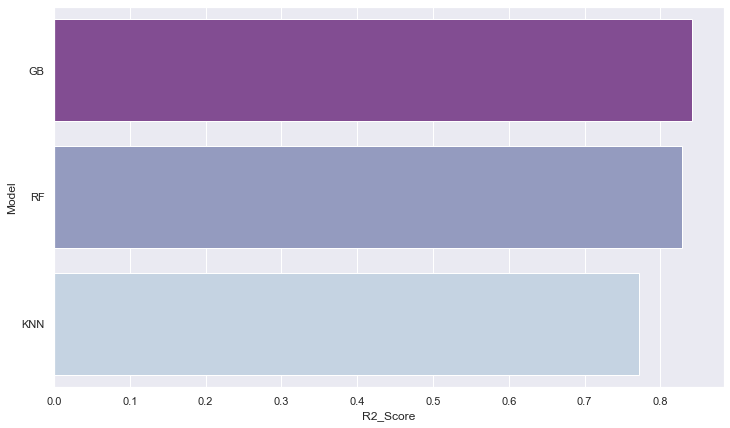

In [80]:
plt.figure(figsize=(12,7))
predict.sort_values(by=['R2_Score'], ascending=False, inplace=True)

sns.barplot(x='R2_Score', y='Model',data = predict, palette='BuPu_r')
plt.xlabel('R2_Score')
plt.ylabel('Model')
plt.show()

# after camparing different models we can state that gradiant boosting model is best suited

In [81]:
y = data['expenses']
x = data.drop('expenses', axis=1)

In [82]:
import joblib

In [83]:
joblib.dump(GB_model,'model_jobliob_gr')

['model_jobliob_gr']

In [84]:
model = joblib.load('model_jobliob_gr')
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('scaler', StandardScaler()),
                ('regressor', GradientBoostingRegressor())])

In [85]:
data = {'age':40,'sex':'male','bmi':40.30,'children':4,'smoker':'yes','region':'southwest'}
df = pd.DataFrame(data,index = [0])
df

,age,sex,bmi,children,smoker,region
0,40,male,40.3,4,yes,southwest


In [86]:
model.predict(df)

array([41809.84701947])

# widgets

In [87]:
x_train 

,age,sex,bmi,children,smoker,region
405,52,female,38.4,2,no,northeast
836,36,male,31.5,0,no,southwest
483,51,female,39.5,1,no,southwest
319,32,male,37.3,1,no,northeast
957,24,male,26.8,1,no,northwest
...,...,...,...,...,...,...
575,58,female,27.2,0,no,northwest
974,26,male,35.4,0,no,southeast
75,57,male,34.0,0,no,northwest
600,18,female,39.2,0,no,southeast


In [88]:
{column : list(x_train[column].unique()) for column in x_train.select_dtypes('object').columns}

{'sex': ['female', 'male'],
 'smoker': ['no', 'yes'],
 'region': ['northeast', 'southwest', 'northwest', 'southeast']}

In [89]:
x_train.describe()

,age,bmi,children
count,935.000000,935.000000,935.000000
mean,39.180749,30.619679,1.100535
std,14.027140,6.178380,1.191759
min,18.000000,16.800000,0.000000
25%,27.000000,25.950000,0.000000
50%,39.000000,30.200000,1.000000
75%,51.000000,34.650000,2.000000
max,64.000000,53.100000,5.000000


In [90]:
widgets.IntSlider()

IntSlider(value=0)

In [91]:
widgets.FloatSlider()

FloatSlider(value=0.0)

In [92]:
widgets.ToggleButtons()

ToggleButtons(options=(), value=None)

In [93]:
widgets.IntSlider(
    value = 60,
    min = 10,
    max = 60,
    step = 1,
    description = 'AGE:'
)

IntSlider(value=60, description='AGE:', max=60, min=10)

In [94]:
widgets.FloatSlider(
    value = 35,
    min = 15,
    max = 54,
    step = 0.01,
    description = 'BMI: ' 
)

FloatSlider(value=35.0, description='BMI: ', max=54.0, min=15.0, step=0.01)

In [95]:
widgets.IntSlider(
    value = 5,
    min = 0,
    max = 10,
    step = 1,
    description ="CHILDREN'S:" 
)

IntSlider(value=5, description="CHILDREN'S:", max=10)

In [96]:
widgets.ToggleButtons(
    options = ['female','male'],
    description = 'SEX: '
)

ToggleButtons(description='SEX: ', options=('female', 'male'), value='female')

In [97]:
widgets.ToggleButtons(
    options = ['no','yes'],
    description = 'SMOKER: '
)

ToggleButtons(description='SMOKER: ', options=('no', 'yes'), value='no')

In [98]:
widgets.Dropdown(
    options = ['northwest', 'southwest', 'northeast', 'southeast'],
    description = 'REGION: '
)

Dropdown(description='REGION: ', options=('northwest', 'southwest', 'northeast', 'southeast'), value='northwes…

In [99]:
Age_widget = widgets.IntSlider(
    value = 60,
    min = 10,
    max = 60,
    step = 1,
    description = 'AGE:'
)

Bmi_widget = widgets.FloatSlider(
    value = 35,
    min = 15,
    max = 54,
    step = 0.01,
    description = 'BMI: ' 
)


Childrens_widget = widgets.IntSlider(
    value = 5,
    min = 0,
    max = 10,
    step = 1,
    description ="CHILDREN'S:" 
)


Sex_widget = widgets.ToggleButtons(
    options = ['female','male'],
    description = 'SEX: '
)


Smoker_widget = widgets.ToggleButtons(
    options = ['no','yes'],
    description = 'SMOKER: '
)


Region_widget = widgets.Dropdown(
    options = ['northwest', 'southwest', 'northeast', 'southeast'],
    description = 'REGION: '
)



widgets.Button(
    description = 'Predict'
)

Button_widget = widgets.Button(
    description = 'Predict'
)

prediction_out = widgets.Output()


def make_prediction(btn):
  x = pd.DataFrame({
      'age':      Age_widget.value,
      'sex':      Sex_widget.value,
      'bmi':      Bmi_widget.value,
      'children': Childrens_widget.value,
      'smoker':   Smoker_widget.value,
      'region':   Region_widget.value
  },index = [0])

  prediction=GB_model.predict(x)

  with prediction_out:
    prediction_out.clear_output()
    print('Your Insurance Premium Per Year is Rs:',format(prediction[0]))



Button_widget.on_click(make_prediction)

In [100]:
display(Age_widget,Bmi_widget,Childrens_widget, Sex_widget, Smoker_widget, Region_widget, Button_widget, prediction_out)

IntSlider(value=60, description='AGE:', max=60, min=10)

FloatSlider(value=35.0, description='BMI: ', max=54.0, min=15.0, step=0.01)

IntSlider(value=5, description="CHILDREN'S:", max=10)

ToggleButtons(description='SEX: ', options=('female', 'male'), value='female')

ToggleButtons(description='SMOKER: ', options=('no', 'yes'), value='no')

Dropdown(description='REGION: ', options=('northwest', 'southwest', 'northeast', 'southeast'), value='northwes…

Button(description='Predict', style=ButtonStyle())

Output()